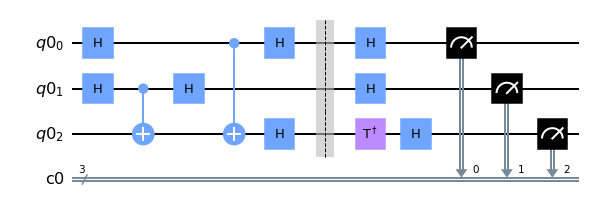

In [1]:
from qiskit import *
qr1 = QuantumRegister(3)
cr1 = ClassicalRegister(3)
xxa = QuantumCircuit(qr1, cr1)
%matplotlib inline
xxa.h(qr1[0])
xxa.h(qr1[1])
xxa.cx(qr1[1],qr1[2])
xxa.h(qr1[1])
xxa.cx(qr1[0],qr1[2])
xxa.h(qr1[0])
xxa.h(qr1[2])

xxa.barrier(qr1)

xxa.tdg(qr1[2])
xxa.h(qr1[0])
xxa.h(qr1[1])
xxa.h(qr1[2])
xxa.measure(qr1, cr1)
xxa.draw(output='mpl')

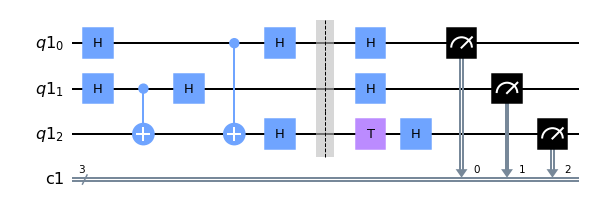

In [2]:
qr2 = QuantumRegister(3)
cr2 = ClassicalRegister(3)
xxb = QuantumCircuit(qr2, cr2)
%matplotlib inline
xxb.h(qr2[0])
xxb.h(qr2[1])
xxb.cx(qr2[1],qr2[2])
xxb.h(qr2[1])
xxb.cx(qr2[0],qr2[2])
xxb.h(qr2[0])
xxb.h(qr2[2])

xxb.barrier(qr2)

xxb.t(qr2[2])
xxb.h(qr2[0])
xxb.h(qr2[1])
xxb.h(qr2[2])
xxb.measure(qr2, cr2)
xxb.draw(output='mpl')

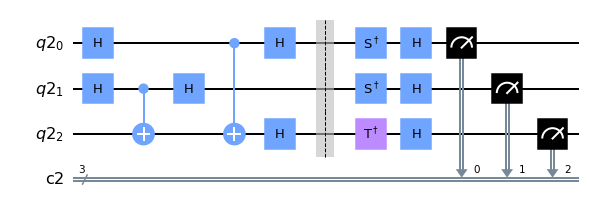

In [3]:
qr3 = QuantumRegister(3)
cr3 = ClassicalRegister(3)
yya = QuantumCircuit(qr3, cr3)
%matplotlib inline
yya.h(qr3[0])
yya.h(qr3[1])
yya.cx(qr3[1],qr3[2])
yya.h(qr3[1])
yya.cx(qr3[0],qr3[2])
yya.h(qr3[0])
yya.h(qr3[2])

yya.barrier(qr3)

yya.tdg(qr3[2])
yya.sdg(qr3[0])
yya.sdg(qr3[1])
yya.h(qr3[0])
yya.h(qr3[1])
yya.h(qr3[2])
yya.measure(qr3, cr3)
yya.draw(output='mpl')

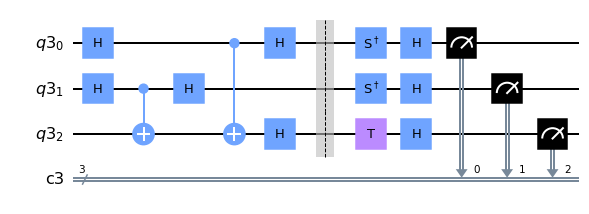

In [4]:
qr4 = QuantumRegister(3)
cr4 = ClassicalRegister(3)
yyb = QuantumCircuit(qr4, cr4)
%matplotlib inline
yyb.h(qr4[0])
yyb.h(qr4[1])
yyb.cx(qr4[1],qr4[2])
yyb.h(qr4[1])
yyb.cx(qr4[0],qr4[2])
yyb.h(qr4[0])
yyb.h(qr4[2])

yyb.barrier(qr4)

yyb.t(qr4[2])
yyb.sdg(qr4[0])
yyb.sdg(qr4[1])
yyb.h(qr4[0])
yyb.h(qr4[1])
yyb.h(qr4[2])
yyb.measure(qr4, cr4)
yyb.draw(output='mpl')

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila')
job1 = execute(xxa, backend=qcomp,shots = 4096)
job2 = execute(xxb, backend=qcomp,shots = 4096)
job3 = execute(yya, backend=qcomp,shots = 4096)
job4 = execute(yyb, backend=qcomp,shots = 4096)
from qiskit.tools.monitor import job_monitor

In [6]:
job_monitor(job1)
job_monitor(job2)
job_monitor(job3)
job_monitor(job4)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [7]:
result1 = job1.result()
result2 = job2.result()
result3 = job3.result()
result4 = job4.result()
from qiskit.tools.visualization import plot_histogram

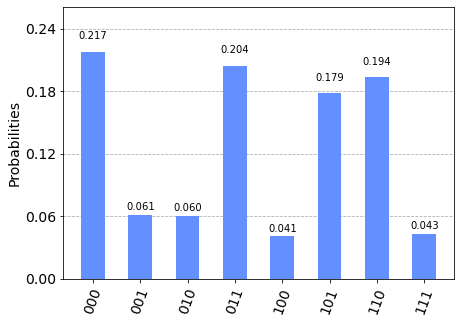

In [8]:
plot_histogram(result1.get_counts(xxa))

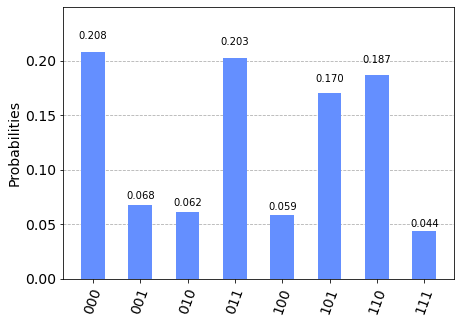

In [9]:
plot_histogram(result2.get_counts(xxb))

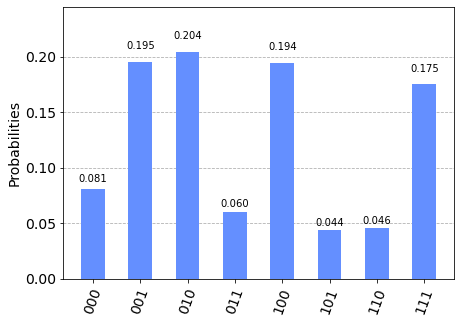

In [10]:
plot_histogram(result3.get_counts(yya))

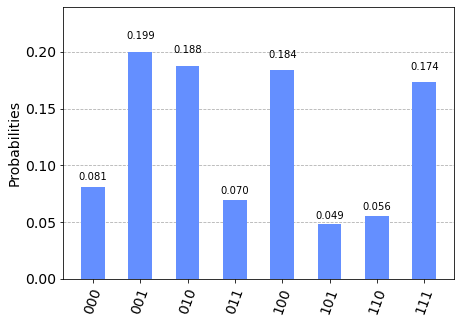

In [11]:
plot_histogram(result4.get_counts(yyb))

In [12]:
p1=((result1.get_counts(xxa)['000']
     +result1.get_counts(xxa)['011']
     +result1.get_counts(xxa)['101']
     +result1.get_counts(xxa)['110']
  
    -(result1.get_counts(xxa)['001']
     +result1.get_counts(xxa)['010']
     +result1.get_counts(xxa)['100']
     +result1.get_counts(xxa)['111']
)
      )/4096)
print(p1)

0.58837890625


In [13]:
p2=((result2.get_counts(xxb)['000']
     +result2.get_counts(xxb)['011']
     +result2.get_counts(xxb)['101']
     +result2.get_counts(xxb)['110']
  
    -(result2.get_counts(xxb)['001']
     +result2.get_counts(xxb)['010']
     +result2.get_counts(xxb)['100']
     +result2.get_counts(xxb)['111']
)
      )/4096)
print(p2)

0.53564453125


In [14]:
p3=((result3.get_counts(yya)['000']
     +result3.get_counts(yya)['011']
     +result3.get_counts(yya)['101']
     +result3.get_counts(yya)['110']
  
    -(result3.get_counts(yya)['001']
     +result3.get_counts(yya)['010']
     +result3.get_counts(yya)['100']
     +result3.get_counts(yya)['111']
)
      )/4096)
print(p3)

-0.53759765625


In [15]:
p4=((result4.get_counts(yyb)['000']
     +result4.get_counts(yyb)['011']
     +result4.get_counts(yyb)['101']
     +result4.get_counts(yyb)['110']
  
    -(result4.get_counts(yyb)['001']
     +result4.get_counts(yyb)['010']
     +result4.get_counts(yyb)['100']
     +result4.get_counts(yyb)['111']
)
      )/4096)
print(p4)

-0.48974609375


In [16]:
print(abs(p1)+abs(p2)+abs(p3)+abs(p4))

2.1513671875
